In [12]:
import cv2
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform 

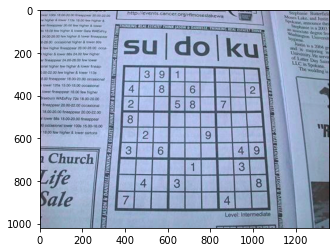

In [13]:
img = cv2.imread("sudoku3.png" )
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(img , cmap="gray")

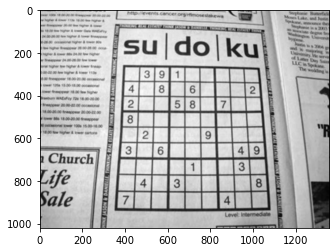

In [14]:
img_blurred = cv2.GaussianBlur(img_gray ,(7,7) , 3)
plt.imshow(img_blurred , cmap="gray")

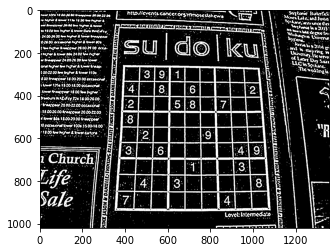

In [15]:
threash = cv2.adaptiveThreshold(img_blurred , 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY_INV , 11 , 2)
#threash = cv2.bitwise_not(threash)  #thresh binary_inv ==
plt.imshow(threash , cmap="gray")

In [16]:
contours = cv2.findContours(threash , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]


In [17]:
contours = sorted(contours , key=cv2.contourArea , reverse=True )

In [18]:
sudoku_contour = None

for contour in contours :
    #epsilon mizane ddeqate  , msln harchi bod bgm moraba ya na daqiq bashe  
    # 
    epsilon = 0.1 * cv2.arcLength(contour , True)
    approx = cv2.approxPolyDP(contour , epsilon ,True)

    if len(approx) == 4 :
       sudoku_contour = approx 
       break
       
if sudoku_contour is None:
    print("natonestm peyda konm sudoku ro")

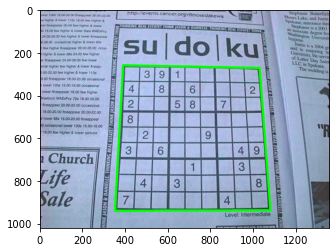

In [19]:
result = cv2.drawContours(img ,[sudoku_contour] , -1 , (0,255,0) ,10)
plt.imshow(result)

True

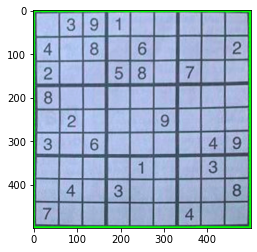

In [23]:
crop = four_point_transform(img, approx.reshape(4,2))
crop = cv2.resize(crop, (500, 500))
plt.imshow(crop)
cv2.imwrite("crop.jpg" , crop)